##  Load the JSON File

In [2]:
import json

file_path = r"Employer_Filter_2021002114.json"

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

print(data.keys())  # Should output: 'total' and 'hits'

print(json.dumps(data['hits'][0], indent=4))


dict_keys(['total', 'hits'])
{
    "id": "bb8e6e50426521122fd53a0673efcda8",
    "headline": "Electromobility specialists with innovation mindset",
    "brief": "Who we are looking forALTEN Electromobility innovation team focus on front line development and the global transition to electrification of transportation. You should be genuinely interest in technology and green transportational solutions!",
    "occupation_group": {
        "label": "\u00d6vriga civilingenj\u00f6rsyrken",
        "concept_id": "mp2Y_vyC_RFV"
    },
    "occupation_field": {
        "label": "Yrken med teknisk inriktning",
        "concept_id": "6Hq3_tKo_V57"
    },
    "employer": {
        "name": "Alten"
    },
    "workplace_addresses": [
        {
            "municipality_concept_id": "muSY_tsR_vDZ",
            "municipality": "Lund",
            "region_concept_id": "CaRE_1nn_cSU",
            "region": "Sk\u00e5ne l\u00e4n",
            "country_concept_id": "i46j_HmG_v64",
            "country": "Sv

## Workplace Addresses (Flattening Nested Data)

In [3]:
import pandas as pd

# Normalize 'hits' into a DataFrame
df = pd.json_normalize(
    data['hits'], 
    record_path=['workplace_addresses'],  # Flatten the nested workplace addresses
    meta=[
        'id', 'headline', 'brief', 
        ['occupation_group', 'label'], 
        ['occupation_field', 'label'], 
        ['employer', 'name'], 
        'publication_date'
    ],
    errors='ignore'
)

print(df.head())

print("Columns in DataFrame:", df.columns)


  municipality_concept_id municipality region_concept_id             region  \
0            muSY_tsR_vDZ         Lund      CaRE_1nn_cSU          Skåne län   
1            kicB_LgH_2Dk   Skellefteå      g5Tt_CAV_zBd  Västerbottens län   
2            muSY_tsR_vDZ         Lund      CaRE_1nn_cSU          Skåne län   
3            kicB_LgH_2Dk   Skellefteå      g5Tt_CAV_zBd  Västerbottens län   
4            kUQB_KdK_kAh     Halmstad      wjee_qH2_yb6       Hallands län   

  country_concept_id  country                                id  \
0       i46j_HmG_v64  Sverige  bb8e6e50426521122fd53a0673efcda8   
1       i46j_HmG_v64  Sverige  bb8e6e50426521122fd53a0673efcda8   
2       i46j_HmG_v64  Sverige  8ac24546d53a74d89c6c73758cde1f4b   
3       i46j_HmG_v64  Sverige  8ac24546d53a74d89c6c73758cde1f4b   
4       i46j_HmG_v64  Sverige  226df8ac81f3a617f2d3c63081a8f532   

                                            headline  \
0  Electromobility specialists with innovation mi...   
1  Electro

## Handle Missing Data

In [4]:
df['municipality'] = df['municipality'].fillna('Unknown')

df = df.fillna({'region': 'Unknown', 'country': 'Unknown'})

print(df.isnull().sum())


municipality_concept_id    0
municipality               0
region_concept_id          0
region                     0
country_concept_id         0
country                    0
id                         0
headline                   0
brief                      0
occupation_group.label     0
occupation_field.label     0
employer.name              0
publication_date           0
dtype: int64


## Save the Cleaned Data

In [6]:
csv_file_path = r"cleaned_employer_data.csv"
df.to_csv(csv_file_path, index=False)

json_file_path = r"cleaned_employer_data.json"
df.to_json(json_file_path, orient='records', lines=True)

print("Data saved successfully!")


Data saved successfully!


## Analyze the Data

### 1. Job Distribution by Location:

municipality
Lund          2
Skellefteå    2
Halmstad      1
Varberg       1
              1
Gävle         1
Stockholm     1
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Municipalities for Job Postings'}, xlabel='municipality'>

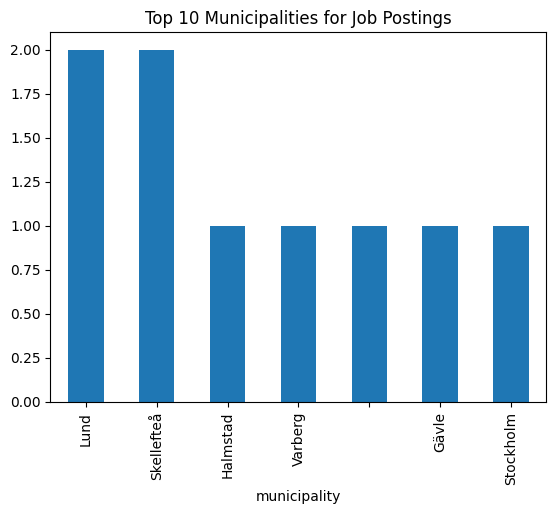

In [7]:
location_counts = df['municipality'].value_counts()
print(location_counts)

location_counts.head(10).plot(kind='bar', title='Top 10 Municipalities for Job Postings')


### 2. Jobs by Employer:

In [8]:
employer_counts = df['employer.name'].value_counts()
print(employer_counts)


employer.name
Alten                            4
AdatoCare AB                     2
Circle K Sverige AB              2
Meet a Group international AB    1
Name: count, dtype: int64


### 3. Jobs by Occupation:

In [9]:
occupation_counts = df['occupation_group.label'].value_counts()
print(occupation_counts)


occupation_group.label
Övriga civilingenjörsyrken                2
Civilingenjörsyrken inom elektroteknik    2
Grundutbildade sjuksköterskor             2
Bensinstationspersonal                    2
Vårdare, boendestödjare                   1
Name: count, dtype: int64


## Insights from the Data

### 1. Top Municipalities for Job Postings

Top 10 Municipalities for Job Postings:
municipality
Lund          2
Skellefteå    2
Halmstad      1
Varberg       1
              1
Gävle         1
Stockholm     1
Name: count, dtype: int64


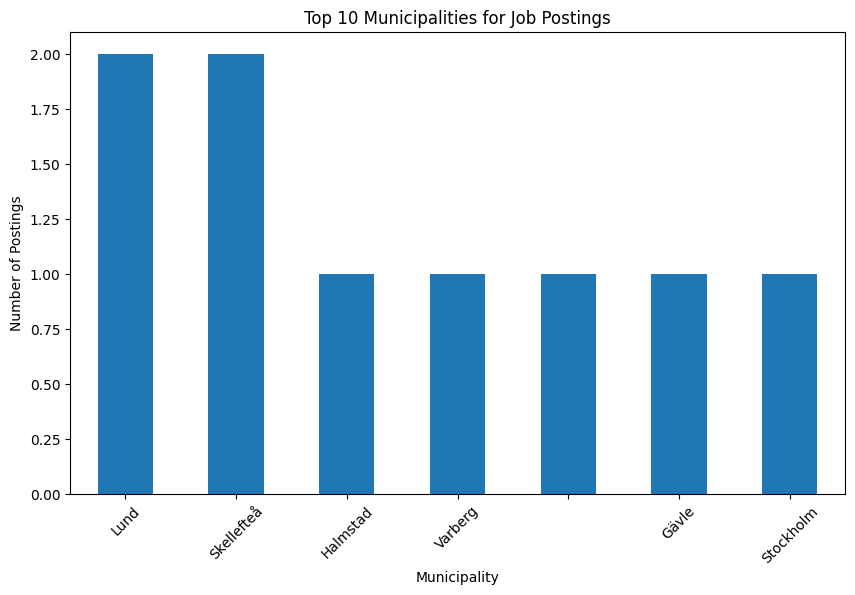

In [10]:
top_municipalities = df['municipality'].value_counts()

print("Top 10 Municipalities for Job Postings:")
print(top_municipalities.head(10))

import matplotlib.pyplot as plt

top_municipalities.head(10).plot(
    kind='bar', figsize=(10, 6), title='Top 10 Municipalities for Job Postings'
)
plt.xlabel("Municipality")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.show()


### 2. Most Active Employers

Top 10 Employers by Job Postings:
employer.name
Alten                            4
AdatoCare AB                     2
Circle K Sverige AB              2
Meet a Group international AB    1
Name: count, dtype: int64


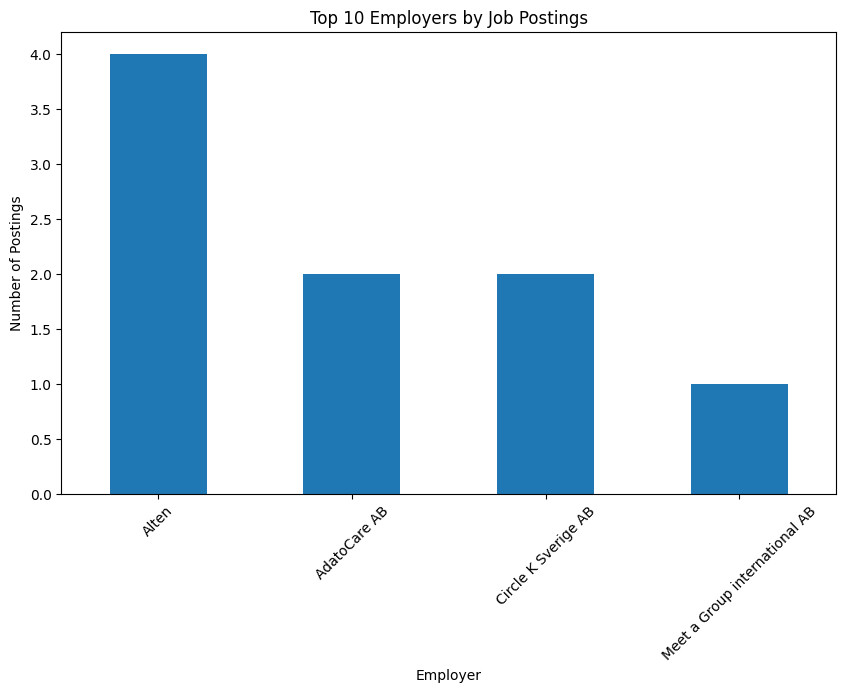

In [11]:
top_employers = df['employer.name'].value_counts()

print("Top 10 Employers by Job Postings:")
print(top_employers.head(10))

top_employers.head(10).plot(
    kind='bar', figsize=(10, 6), title='Top 10 Employers by Job Postings'
)
plt.xlabel("Employer")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.show()


### 3. Demand by Job Categories

Top 10 Job Categories by Demand:
occupation_group.label
Övriga civilingenjörsyrken                2
Civilingenjörsyrken inom elektroteknik    2
Grundutbildade sjuksköterskor             2
Bensinstationspersonal                    2
Vårdare, boendestödjare                   1
Name: count, dtype: int64


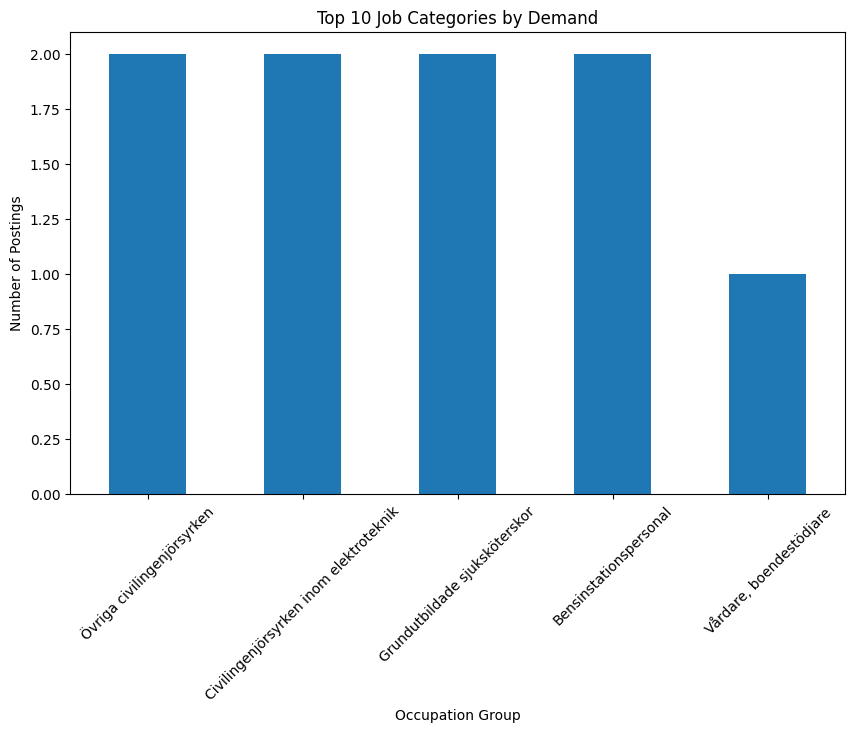

In [12]:
top_occupation_groups = df['occupation_group.label'].value_counts()

print("Top 10 Job Categories by Demand:")
print(top_occupation_groups.head(10))

top_occupation_groups.head(10).plot(
    kind='bar', figsize=(10, 6), title='Top 10 Job Categories by Demand'
)
plt.xlabel("Occupation Group")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.show()


### 4. Publication Date Analysis

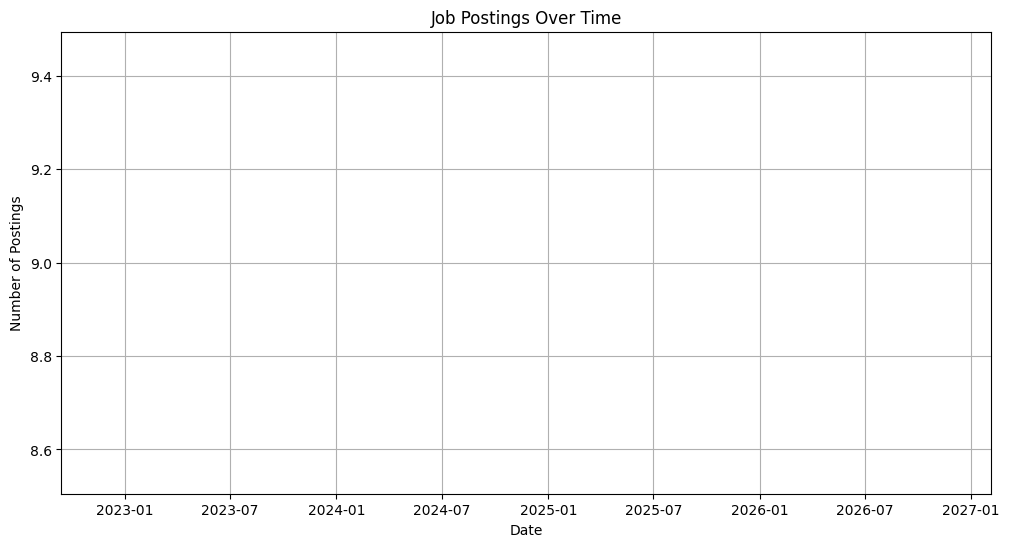

In [13]:
df['publication_date'] = pd.to_datetime(df['publication_date'])

date_trends = df['publication_date'].dt.date.value_counts().sort_index()

date_trends.plot(
    kind='line', figsize=(12, 6), title='Job Postings Over Time'
)
plt.xlabel("Date")
plt.ylabel("Number of Postings")
plt.grid()
plt.show()


### 5. Combined Insights

In [14]:
most_common_municipality = top_municipalities.idxmax()
most_common_employer = top_employers.idxmax()
most_common_category = top_occupation_groups.idxmax()

print(f"Most Common Municipality: {most_common_municipality}")
print(f"Most Active Employer: {most_common_employer}")
print(f"Most Demanded Job Category: {most_common_category}")


Most Common Municipality: Lund
Most Active Employer: Alten
Most Demanded Job Category: Övriga civilingenjörsyrken
